<a href="https://colab.research.google.com/github/vivekswamy021/Amazon_Stock_Price_Timeseries_Forecasting_/blob/main/Amazon_Stock_Price_Timeseries_Forecasting_UsingLibrary(Prophet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

#Importing libraries for visualization
import matplotlib.pylab as plt
import seaborn as sns

#Importing library for date manipulation
from datetime import datetime

#To calculate the MSE or RMSE
from sklearn.metrics import mean_squared_error

#Importing acf and pacf functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Importing models from statsmodels library
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

#To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AMZN_stock_data.csv to AMZN_stock_data (1).csv


In [ ]:
df= pd.read_csv("AMZN_stock_data.csv")
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...
6982,2025-02-14 00:00:00-05:00,229.199997,229.889999,227.229996,228.679993,27031100,0.0,0.0
6983,2025-02-18 00:00:00-05:00,228.820007,229.300003,223.720001,226.649994,42975100,0.0,0.0
6984,2025-02-19 00:00:00-05:00,225.520004,226.830002,223.710007,226.630005,28566700,0.0,0.0
6985,2025-02-20 00:00:00-05:00,224.779999,225.130005,221.809998,222.880005,30001700,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64
 3   Low           6987 non-null   float64
 4   Close         6987 non-null   float64
 5   Volume        6987 non-null   int64  
 6   Dividends     6987 non-null   float64
 7   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 436.8+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
6982,False
6983,False
6984,False
6985,False


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [ ]:
# Data Cleaning and Preprocessing

# Convert the 'Date' column to datetime format if not already in proper datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


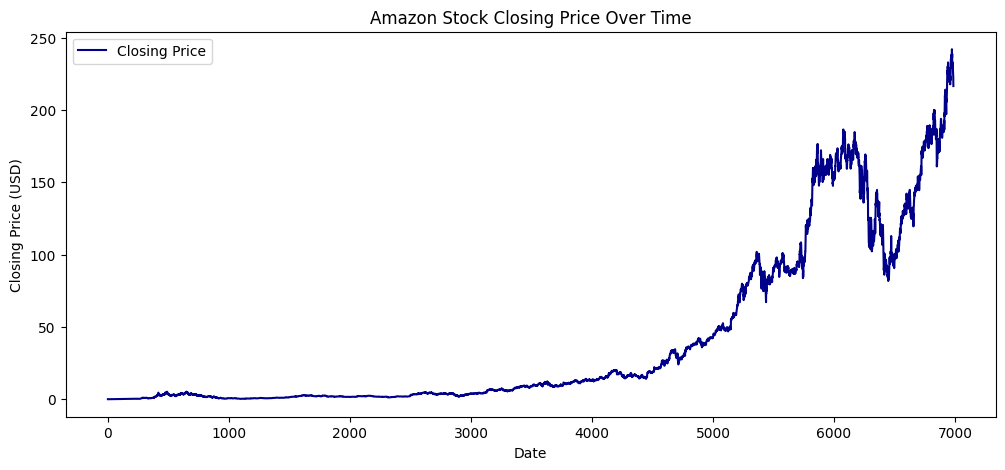

In [ ]:
# 1. Stock Closing Price Trend Over Time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Close'], color='darkblue', label='Closing Price')
plt.title('Amazon Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

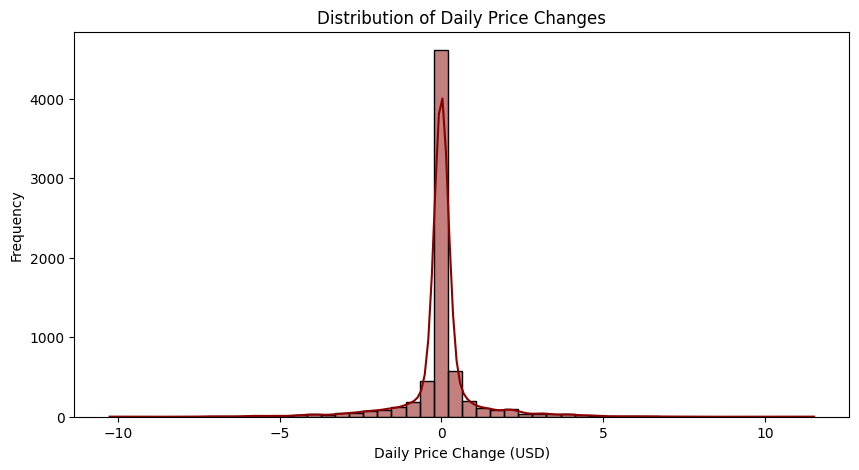

In [ ]:
# 2. Daily Price Change Distribution
df['Daily Change'] = df['Close'] - df['Open']

plt.figure(figsize=(10, 5))
sns.histplot(df['Daily Change'], bins=50, kde=True, color="darkred")
plt.title("Distribution of Daily Price Changes")
plt.xlabel("Daily Price Change (USD)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# 3. Moving Averages (50-day & 200-day)
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()


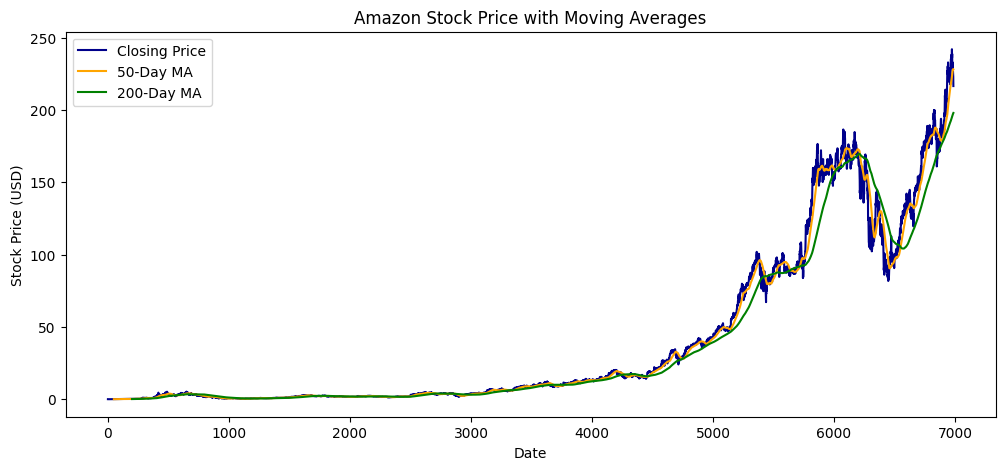

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Close'], label="Closing Price", color="darkblue")
plt.plot(df.index, df['50_MA'], label="50-Day MA", color="orange")
plt.plot(df.index, df['200_MA'], label="200-Day MA", color="green")
plt.title("Amazon Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


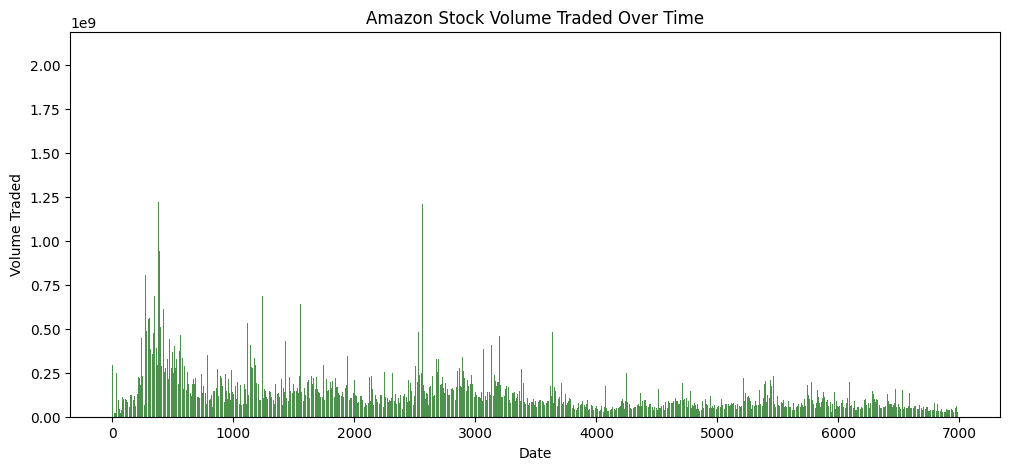

In [ ]:
# 4. Stock Volume Traded Over Time
plt.figure(figsize=(12, 5))
plt.bar(df.index, df['Volume'], color="darkgreen", alpha=0.7)
plt.title("Amazon Stock Volume Traded Over Time")
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.show()

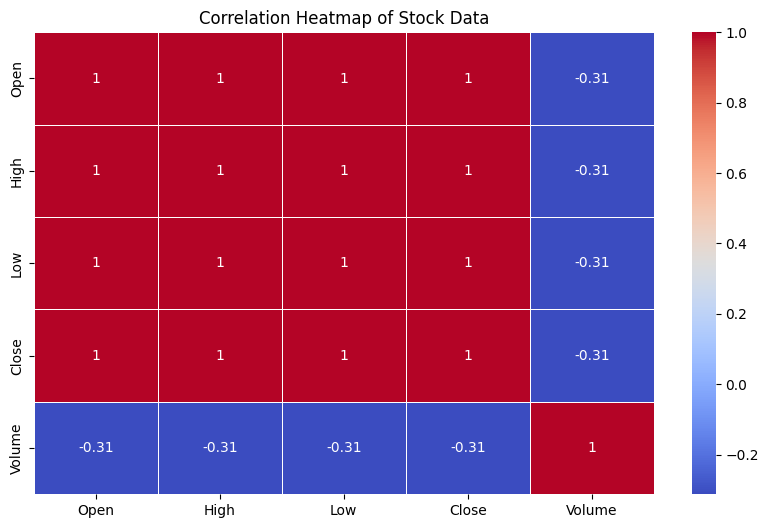

In [ ]:
# 5. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Data")
plt.show()

##**Distribution of Adjusted Closing Prices**

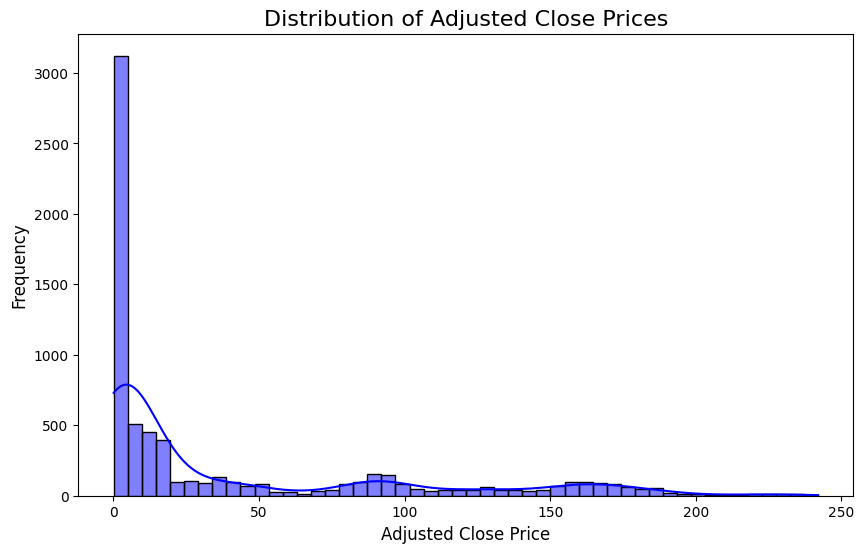

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='blue')
plt.title('Distribution of Adjusted Close Prices', fontsize=16)
plt.xlabel('Adjusted Close Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

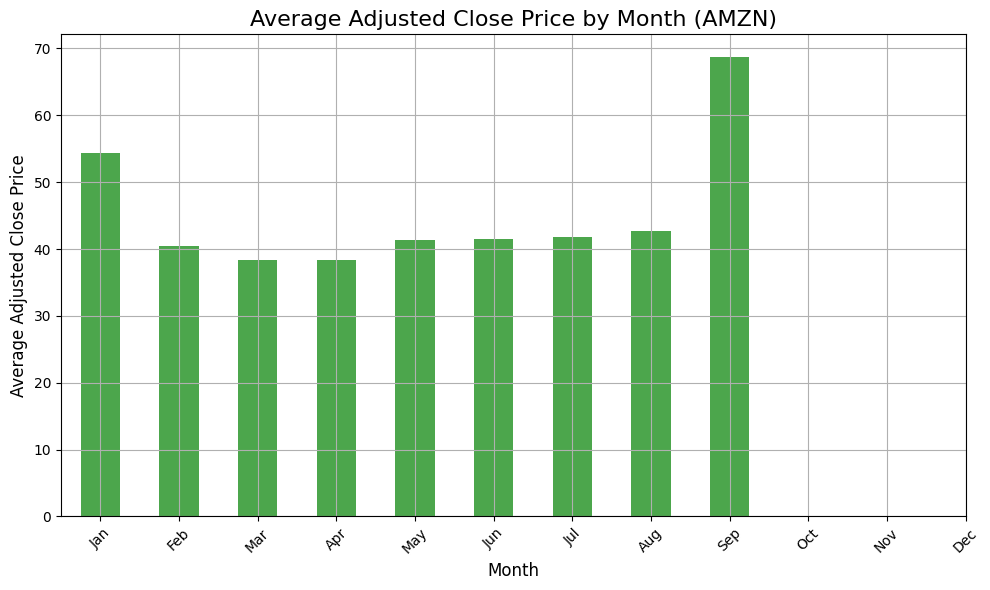

In [ ]:
# Ensure the 'Date' column is in datetime format
if not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'], utc=True)

# Extract month from the Date column
df['month'] = df['Date'].dt.month

# Calculate average adjusted close price by month
monthly_avg = df.groupby('month')['Close'].mean()

# Plotting
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='green', alpha=0.7)
plt.title('Average Adjusted Close Price by Month (AMZN)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Adjusted Close Price', fontsize=12)
plt.grid(True)
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()


##Prepare data for predictive modeling

##In a stock context, predicting the Close using other values of the same day can be insightful for baseline analysis

In [ ]:

from sklearn.model_selection import train_test_split

features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']
target = 'Close'

# Define the feature matrix X and target vector y
X = df[features]
y = df[target]

# Split the data into training and test sets to evaluate the predictive performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (5589, 6)
Test set shape: (1398, 6)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
}

In [ ]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R2 Score": r2, "RMSE": rmse}


In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,R2 Score,RMSE
Linear Regression,0.999931,0.487740
Decision Tree,0.999840,0.739621
Random Forest,0.999889,0.617907
Gradient Boosting,0.999842,0.736016
XGBoost,0.999694,1.023933


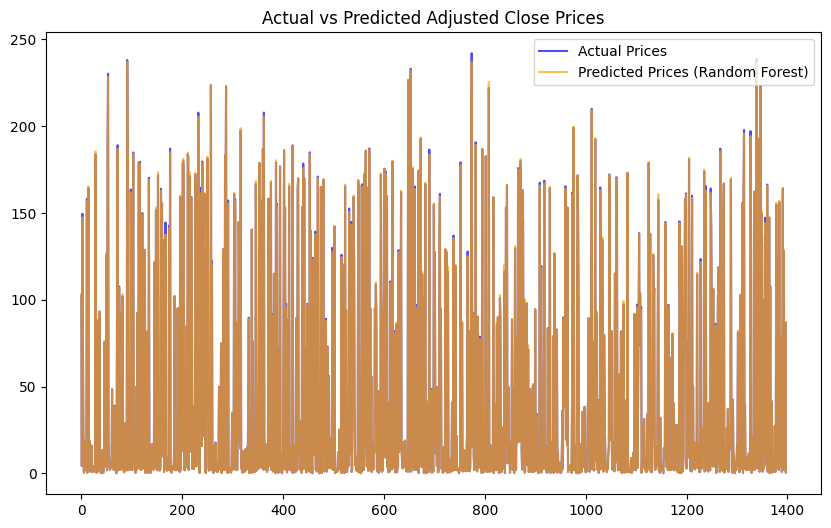

In [ ]:
rf_model = models["Random Forest"]
y_pred_rf = rf_model.predict(X_test)


plt.figure(figsize=(10, 6))
plt.barplot(y_test.values, label='Actual Prices', color='blue', alpha=0.7)
plt.plot(y_pred_rf, label='Predicted Prices (Random Forest)', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Adjusted Close Prices')
plt.legend()
plt.show()

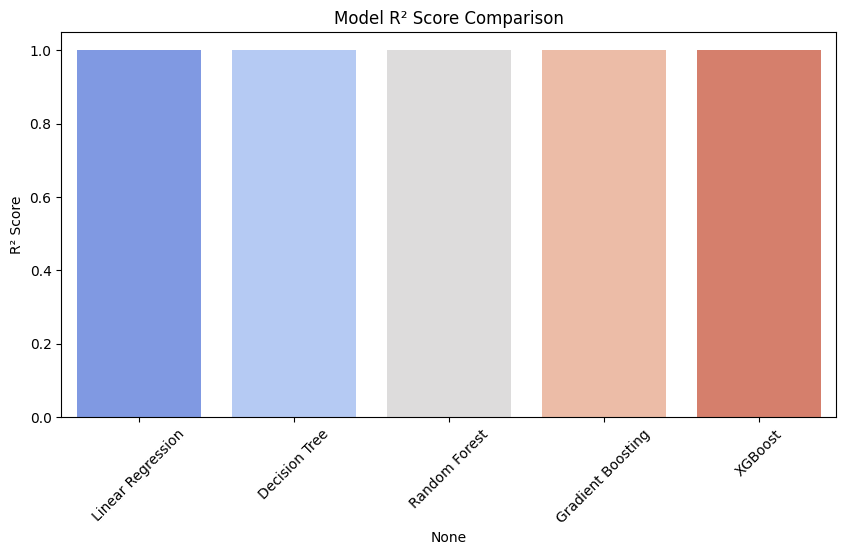

In [ ]:
# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R2 Score"], palette="coolwarm")
plt.title("Model R² Score Comparison")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()

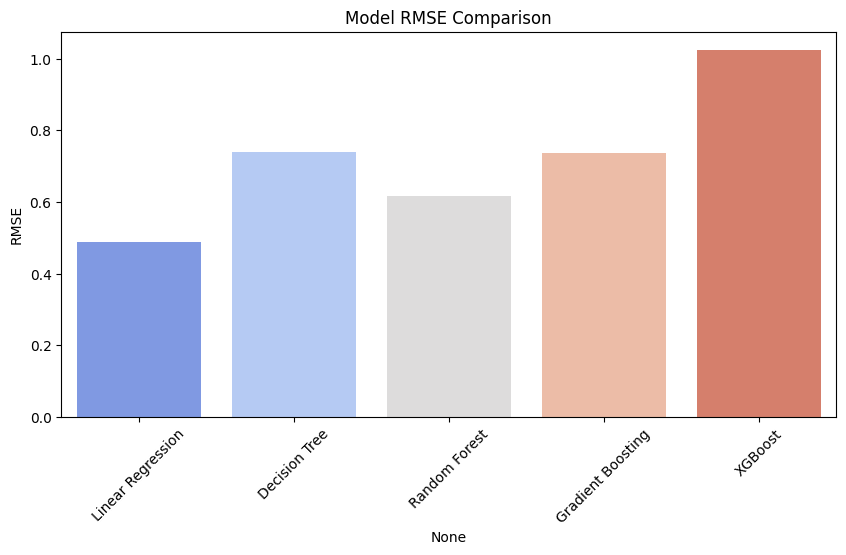

In [ ]:

plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="coolwarm")
plt.title("Model RMSE Comparison")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplet_ij9e/6olph47c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplet_ij9e/7d1qxprm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1441', 'data', 'file=/tmp/tmplet_ij9e/6olph47c.json', 'init=/tmp/tmplet_ij9e/7d1qxprm.json', 'output', 'file=/tmp/tmplet_ij9e/prophet_modeldeejr1_0/prophet_model-20250408100845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:08:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:08:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


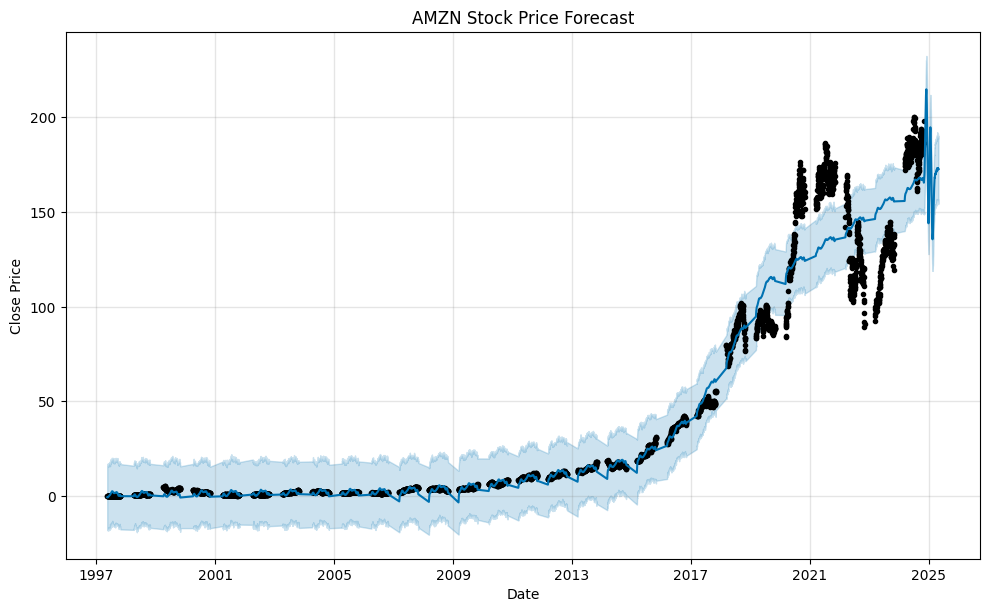

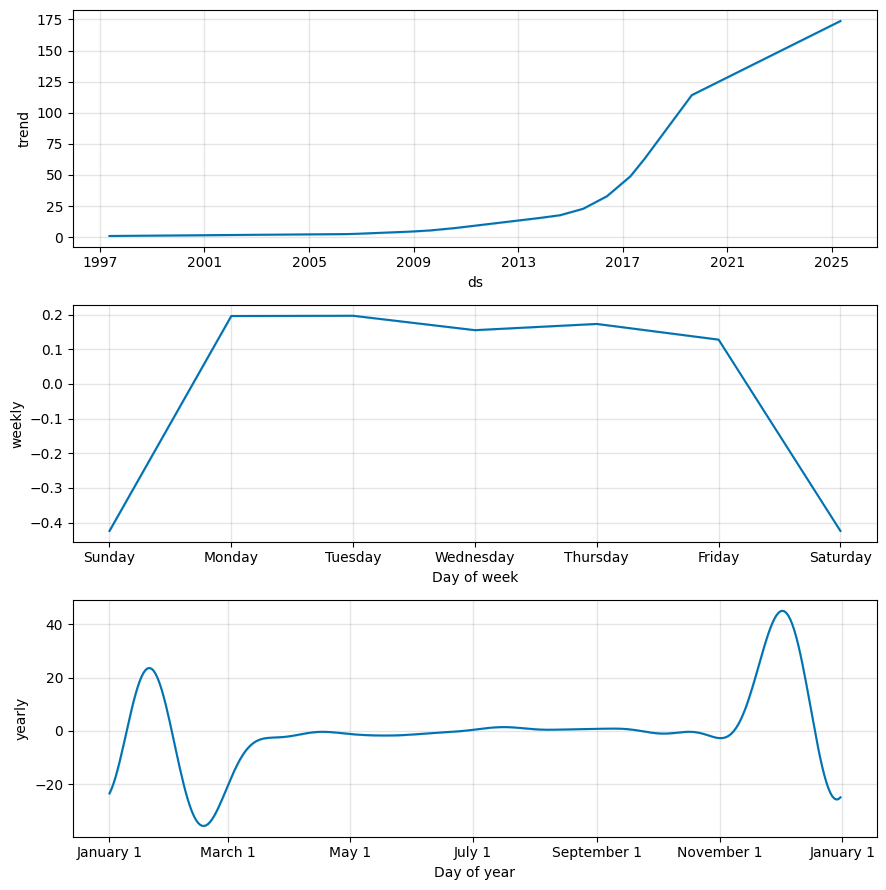

In [ ]:
from prophet import Prophet

# Rename columns to match Prophet format
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Convert 'ds' column to datetime and remove timezone if present
df_prophet['ds'] = pd.to_datetime(df_prophet['ds']).dt.tz_localize(None)

# Drop rows with NaN values in the 'ds' column
df_prophet.dropna(subset=['ds'], inplace=True)

# Initialize and fit the model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe (e.g., forecast 180 days into the future)
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("AMZN Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

# Optional: Show forecast components (trend, weekly, yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()

- ds = datetime column, y = value to forecast

- You can change periods=180 to however many days into the future you want

- Prophet automatically detects trends and seasonality



##Main Forecast Plot (model.plot(forecast))

Black dots = Historical AMZN closing prices.

Blue line = Forecasted prices for the next 180 days.

Shaded blue area = 95% confidence interval.

##Observations:

Trend Continuation:

- If AMZN had consistent growth, the forecast likely continues this upward trend.

- If the recent data showed a plateau or decline, the forecast may reflect a flattening or slight drop.

Volatility Consideration:

- Wider shaded areas suggest higher uncertainty in future predictions (common with stocks).

Short-Term Movements:

- Prophet isn’t tuned for short-term trading decisions. It forecasts overall movement, not daily volatility.

- Component Plot (model.plot_components(forecast))
This shows the breakdown of:

Trend:

- Overall direction of stock price over time.

- see a steep rise during boom years, flattening later if recent data shows stabilization.

Yearly Seasonality:

- Indicates recurring patterns across months/years.

- light increases in Nov/Dec (holiday season) or dips during summer months.

Weekly Seasonality:

- Stock prices might show mild weekly cycles (e.g., higher prices midweek).

- Typically subtle for large stocks like AMZN.





- Prophet is best for capturing general patterns, not sharp market reactions.

- Business decisions or investment strategies should not rely solely on this — but it’s useful for understanding underlying trends and seasonality.